<a href="https://colab.research.google.com/github/Dobarri/DL_CV_study/blob/main/w1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.2 **Hello tensorflow 2.0**

2022년 5월 18일 기준 colab에서 tensorflow를 불러오면 2.8.0 version을 불러온다.

~~tensorflow 2.0 version을 선택해보자. ~~

안된다. 2.8 version으로만 불러진다. 그냥 해보자.



version정보를 불러오기 위해서는 'tensorflow.__version__'으로 확인할 수 있다.

주의할 점은 언더바가 앞 뒤로 2개씩 들어간다는 것

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.8.0


In [ ]:
try: 
    # %tensorflow_version only exist in Colab.
    %tensorflow_version 2.0.0
except Exception:
    pass

import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.0.0`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


tensorflow를 다 치기 귀찮으므로 tf로 줄여서 부르도록 하자.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#**3.3 tensorflow 기초**

뉴런의 원조격인 perceptron의 한계를 지적하는데 사용된 AND, OR, XOR 연산을 할 수 있는 neural network를 만들어보자.

##**3.3.1 난수(random number) 생성**

신경망은 많은 숫자로 구성된 행렬이라고 할 수 있다. 여기서 행렬을 구성하는 숫자는 랜덤한 값으로 지정해 줄 수밖에 없다. 신경망의 초기값을 지정해주는 것을 초기화(initialization)라고 한다.


여기서는 간단하게 initialization을 해보겠다.

tf.random.uniform()함수는 **균일분포(uniform distribution)의 난수**를  반환한다.

균일분포란 최솟값과 최댓값 사이의 모든 수가 나올 확률이 동일한 분포에서 수를 뽑는 것이다. 

In [ ]:
#random.uniform([크기], 최솟값, 최댓값)
rand = tf.random.uniform([1],0,1)
print(rand)

tf.Tensor([0.4732405], shape=(1,), dtype=float32)


**정규분포**의 난수를 구하기 위해서는 

tf.random.normal을 해주면 된다.

평균이 0이고, 표준편차가 1인 정규분포를 **표준정규분포**라고 한다.

In [ ]:
#random.normal([크기], 평균, 표준편차)
rand = tf.random.normal([1],0,1)
print(rand)

tf.Tensor([-0.9696456], shape=(1,), dtype=float32)


##**3.3.2 뉴런 만들기**


뉴런 : 신경망의 가장 기본적인 구성요소(예전에는 퍼셉트론이라고 불렀으며 입력을 받아서 계산 후 출력을 반환하는 단순한 구조)

신경망 : 뉴런이 여러 개 모여 레이어를 구성 → 레이어가 다시 모여 신경망 구성

뉴런은 **입력, 가중치, 활성화함수, 출력**으로 구성

(입력 →weight → activation function → 출력)

- 활성화 함수(activation function) : 뉴런의 출력값을 정하는 함수
    - sigmoid : s 곡선. 출력값 0~1 사이
    - ReLU(Rectified Linear Unit) : 선형 함수를 정류해서 음수 값을 0으로 만든 함수. 출력값 양수 그대로

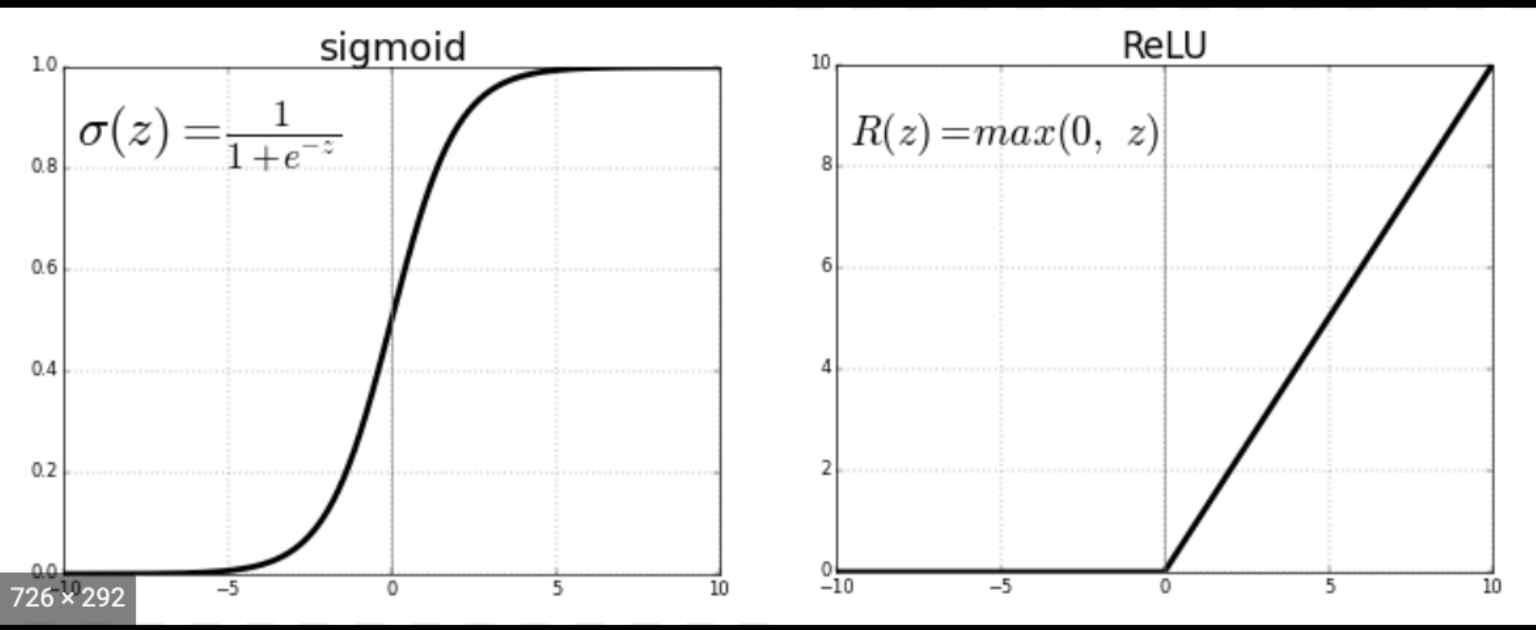

- 가중치(weight) : 뉴런에서 학습할 때 변하는 것. 처음에 초기화를 통해 랜덤한 값을 넣고 학습 과정에서 점차 일정한 값으로 수렴. 학습이 잘 된다 == 좋은 가중치를 얻어서 원하는 출력에 가까운 값을 얻는다
- 은닉층 : 입력층, 출력층 제외한 나머지 부분(weight, activation function)

**역전파(Backpropagation)**는 먼저 계산 결과와 정답의 오차를 구해 이 오차에 관여하는 값들의 가증치를 수정하여 오차가 작아지는 방향으로 일정 횟수를 반복해 수정하는 방법이다.


딥러닝에서 역전파를 시킬 때 sigmoid function을 사용하면 값을 점점 작아지게 하는 문제를 해결하기위해 ReLU가 대안으로 제시되었고, 은닉층을 많이 사용하게 되면서 ReLU함수를 activation function으로 많이 사용하게 되었다.  

여기서는 sigmoid activation function을 사용하겠다. 

sigmoid함수는 출력을 0과1사이로 제한하기 떄문에 AND, OR, XOR을 구현할 때 적합하다.

In [2]:
#sigmoid 함수

import math

def sigmoid(x) :
    return 1/(1+math.exp(-x))

입력 : 1, 기대출력 : 0인 뉴런을 만들어보자.

학습을 진행하면서 기대출력과 실제출력이 가까워지도록 가중치가 조정된다.

In [15]:
x = 1
y = 0
#가중치는 랜덤한 값으로 설정
w = tf.random.normal([1], 0, 1);

output = sigmoid(w*x)
print(output)

0.19445486937188236


뉴런의 학습은 error(기대출력인 0과 output의 차이)가 0에 가까워지도록 weight를 조정하는 것이다.

보통 **경사 하강법(Gradient Descent)**을 사용한다.
 
경사하강법은 w에 입력x학습률x에러를 더해주어서 가중치를 updata한다   —>   W = W + x * learning_rate * error

In [16]:
for i in range(1000) :
    output = sigmoid(w*x)
    error = y - output
    w = w + x*0.1*error

    if i%100 == 99 :
        print(i, error, output)

99 -0.07167083829486894 0.07167083829486894
199 -0.0426810981343303 0.0426810981343303
299 -0.030221783540954353 0.030221783540954353
399 -0.02334464254612179 0.02334464254612179
499 -0.018998337318288972 0.018998337318288972
599 -0.016007592045763235 0.016007592045763235
699 -0.013825738888225726 0.013825738888225726
799 -0.012164616979753589 0.012164616979753589
899 -0.010858195193575063 0.010858195193575063
999 -0.009804084614710601 0.009804084614710601


error가 0에 가까워 지는 것을 볼 수 있다.

In [17]:
#입력이 0이고 기대출력이 1인 뉴런

x = 0
y = 1
w = tf.random.normal([1], 0, 1)

for i in range(1000) :
    output = sigmoid(w*x)
    error = y - output
    w = w + x*0.1*error

    if i%100 == 99 :
        print(i, error, output)

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


error와 output이 0에서 변하지 않는다.

W = W + x * learning_rate * error에서 x의 초기값이 0이기 때문에 w값이 변하지 않는다. 

이럴 경우 weight값을 Update해주기 위해 **편향(bias)**를 추가해준다.



In [19]:
x = 0
y = 1
w = tf.random.normal([1], 0, 1)
#bias
b = tf.random.normal([1], 0, 1)

for i in range(1000) :
    output = sigmoid(w*x + 1*b)
    error = y - output
    w = w + x*0.1*error
    #update bias
    b = b + 1*0.1*error

    if i%100 == 99 :
        print(i, error, output)

99 0.0785041175275566 0.9214958824724434
199 0.045093973872037174 0.9549060261279628
299 0.03142801128827377 0.9685719887117262
399 0.024063024619019213 0.9759369753809808
499 0.0194735119202204 0.9805264880797796
599 0.016344635292504628 0.9836553647074954
699 0.014076982410297423 0.9859230175897026
799 0.012359023446561701 0.9876409765534383
899 0.011013025388553643 0.9889869746114464
999 0.009930266034109403 0.9900697339658906


##**3.3.3 AND 신경망 네트워크**

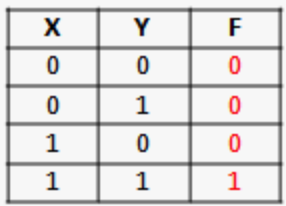


입력은 숫자 2개로 제한한다.

In [5]:
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[0],[0],[0]])

#input size가 2개니까 [2]
w = tf.random.normal([2],0,1)
b = tf.random.normal([1],0,1)
b_x = 1

for i in range(2000) :
    error_sum = 0
    for j in range(4) :
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error = y[j][0] - output
        w = w + x[j]*0.1*error
        b = b + b_x*0.1*error
        #그냥 Error를 더하면 +,-값일 때 상쇄될 수 있음
        error_sum += abs(error)
    if i%200 == 199 :
        print(i, error_sum)

199 0.6340190486324637
399 0.3794531675832487
599 0.268921667366385
799 0.20740910307131744
999 0.16841624959433324
1199 0.1415742290915309
1399 0.12200749037593414
1599 0.10713148767824278
1799 0.09545018943651183
1999 0.08604086627403226


학습을 통해 error가 0에 가까워진것을 확인했고 AND연산을 할 준비가 되었다는 걸 알 수 있다.

학습했다는 것은 weight와 bias값을 구한것이므로 sigmoid함수를 이용해 출력값을 확인해보자.

In [7]:
#network 평가

for i in range(4) :
    print('X: ', x[i], 'Y: ', y[i], 'output: ', sigmoid(np.sum(x[i]*w)+b))

X:  [1 1] Y:  [1] output:  0.9645822983255243
X:  [1 0] Y:  [0] output:  0.025096577411744883
X:  [0 1] Y:  [0] output:  0.02517378610817831
X:  [0 0] Y:  [0] output:  2.4408704439816603e-05


출력이 AND연산 결과에 맞게 잘 나오는 것을 볼 수 있다.


##**3.3.4 OR 신경망 네트워크**##

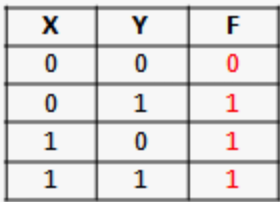

AND 네트워크와 거의 비슷하며 y의 기대출력값만 바뀐다.

In [11]:
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[1],[1],[1],[0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000) :
    error_sum = 0
    for j in range(len(x)) :
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error = y[j][0] - output
        w = w + x[j]*0.1*error
        b = b + b_x*0.1*error
        error_sum += abs(error)
    
    if i%200 == 199 :
        print(i, error_sum)

199 0.39159719063392234
399 0.22009955328656836
599 0.15113642787618192
799 0.11454950967225126
999 0.09202582633817372
1199 0.07681430086925431
1399 0.0658718832885116
1599 0.05763231030978828
1799 0.05120875602381052
1999 0.04606458169141797


In [12]:
for i in range(4) :
    print('X: ', x[i], 'Y: ', y[i], 'output: ', sigmoid(np.sum(x[i]*w)+b))

X:  [1 1] Y:  [1] output:  0.9999972014104799
X:  [1 0] Y:  [1] output:  0.989781704751857
X:  [0 1] Y:  [1] output:  0.9897647729414057
X:  [0 0] Y:  [0] output:  0.025544517349857274


OR 연산결과가 잘 나오는 것을 확인할 수 있다

##**3.3.4 XOR 신경망 네트워크**##

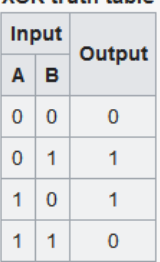

In [3]:
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000) :
    error_sum = 0
    for j in range(len(x)) :
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error = y[j][0] - output
        w = w + x[j]*0.1*error
        b = b + b_x*0.1*error
        error_sum += abs(error)
    if i%200 == 199 :
        print(i, error_sum)

199 2.050941472181237
399 2.051256304266449
599 2.0512699441510653
799 2.051270505377719
999 2.0512705267840747
1199 2.0512705258533646
1399 2.0512705258533646
1599 2.0512705258533646
1799 2.0512705258533646
1999 2.0512705258533646


error값이 변하지 않는다

In [4]:
#evaluate
for i in range(4) :
    print('X: ', x[i], 'y: ', y[i], 'output: ', sigmoid(np.sum(x[j]*w)+b))

X:  [1 1] y:  [0] output:  0.5000000009313226
X:  [1 0] y:  [1] output:  0.5000000009313226
X:  [0 1] y:  [1] output:  0.5000000009313226
X:  [0 0] y:  [0] output:  0.5000000009313226


output이 0.5에 머물러 있다.

w,b값을 확인해보자

In [5]:
print('weights:', w)
print('bias: ', b)

weights: tf.Tensor([ 5.1281754e-02 -7.4505806e-09], shape=(2,), dtype=float32)
bias:  tf.Tensor([3.7252903e-09], shape=(1,), dtype=float32)


y = f(w1*x1 + w2*x2 + b)에서

w는 x와 곱해지기 때문에 첫 번째 입력이 두 번째 입력보다 큰 영향을 미치고 b는 거의 영향이 없다.

계산해보면 np.sum(x[j]*w)+b가 0에 가까워 지므로 sigmoid출력이 0.5에 가까워진다. (sigmoid는 0일때 0.5)

이것이 인공지능의 겨울을 불러왔다.



→ 해결책은 여러 개의 퍼셉트론을 사용하는 것이다!

keras의 sequential함수를 이용해서 dense layer를 일직선으로 배치한다.

첫 번째 layer에는 반드시 input_shape를 명시해주어야한다!


In [6]:
import numpy as np

x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0],[1],[1],[0]])

#3개의 뉴런 사용. keras의 Sequantial함수로 Dense layer를 쌓는다.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

units은 레이어를 구성하는 뉴런의 수를 의미한다. 

뉴런이 많을수록 레이어의 성능은 좋아지지만 계산량이 많아진다.

activation function으로는 sigmoid를 사용했다.

그리고 model이 동작할 수 있도록 compile해주자.

SGD는 Stochastic Gradient Descent의 약자로 확률적 경사하강법을 의미한다.

'확률적'은 전체를 한 번에 계산하지 않고 확률적으로 일부 샘플을 구해서 나눠서 계산하겠다는 뜻이다.

손실(loss)는 error와 비슷한 개념이다. 학습을 진행할 때 loss를 줄이는 방향으로 학습한다. mse는 mean squared error의 약자로 error의 차이를 제곱한 것을 평균낸 값이다. 

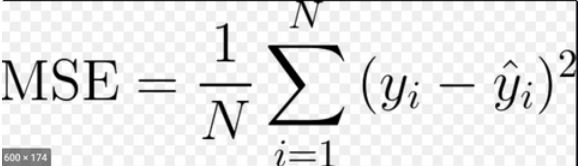

In [7]:
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


여기서 이상한 점을 발견해야한다.

우리는 input이 2개이고 첫 번째 layer의 unit이 2개이므로 parameter가 4개, 두 번쨰 layer에는 input이 2개이고 unit이 1개이므로 parameter가 2개인 것으로 알고있다.

하지만 summary를 보면 parameter가 layer마다 각각 6,3개인 것으로 나온다.

그 이유는 ***bias를 포함***하기 때문이다.

layer마다 bias에 대한 Parmameter가 각 unit에 추가된다.

이제 만든 모델을 학습시켜봅시다.

fit함수를 사용해서 학습시킵니다.  epochs수 만큼 반보해서 학습시키게 되고 batch_size는 한 번에 학습시키는 데이터의 수이다. 

보통은 batch_size를 1로 하지 않지만 간단한 모델이고 입력에 대한 정확한 값을 출력하는 지 확인하기 위해 batch_size를 1로 설정하겠습니다.

In [9]:
history = model.fit(x , y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 2s 4ms/step - loss: 0.2540
Epoch 2/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 3/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 4/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 5/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 6/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 7/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2540
Epoch 8/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 9/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2540
Epoch 10/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.2538
Epoch 11/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 12/2000
4/4 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 13/2000
4/4 [==============================

이제 학습이 끝났습니다.
loss가 처음엔 0.2540이었다가 2000번 반복하니 0.056정도로 많이 감소했네요.

학습된 모델이 좋은 성능을 내는지 평가해봅시다!

predict함수를 사용해서 평가를 진행합니다.

In [10]:
model.predict(x)

array([[0.3222892 ],
       [0.7802289 ],
       [0.78072226],
       [0.14244454]], dtype=float32)

1,4번째 값은 0에 가깝게

2,3번째 값은 1에 가깝게 예측한 것을 볼 수 있습니다.

model의 parameter를 확인해봅시다.

입력과 레이어, 레이어와 레이어를 연결하는 가중치는 kernel이고

편향과 연결된 가중치는 bias로 나타나요.

In [11]:
for w in model.weights :
    print(w)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.9324884, -2.2622213],
       [-4.918625 , -2.2570407]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([1.2986917, 3.0329752], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.5638065],
       [ 4.3116374]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-1.5376067], dtype=float32)>


이렇게 확인하니 가중치들이 얼마나 영향을 미치는 지 확인하기가 어렵습니다.

뉴런과 레이어가 많아지면 이 문제가 더 커집니다. 

그래서 시각화도구를 사용해서 확인해봅시다.

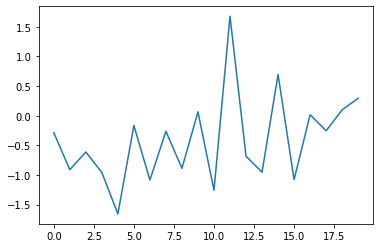

In [12]:
import matplotlib.pyplot as plt

#normal distrubution을 따르는 랜덤한 y값 시각화
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x,y)
plt.show()

기본은 꺾은선 그래프입니다. 표시 형식은 점, 점선으로 바꿀 수 있고 색도 바꿀 수 있습니다.

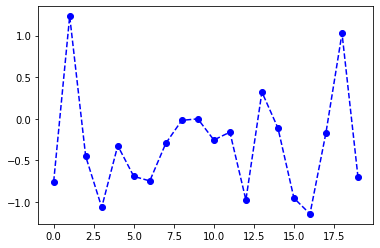

In [13]:
import matplotlib.pyplot as plt

#normal distrubution을 따르는 랜덤한 y값 시각화
x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x,y,'bo--')
plt.show()

hist함수로 histogram도 그려볼 수 있습니다.

bins는 데이터를 몇 개의 영역으로 나눌지를 정의하는 것 입니다.

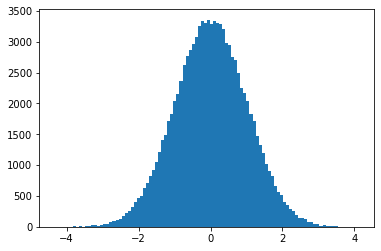

In [14]:
import matplotlib.pyplot as plt

random_normal = tf.random.normal([100000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

위의 XOR네트워크를 fit으로 학습이 진행되는 동안 loss가 어떻게 감소하는 지 그래프로 시각화해보죠.

plot함수에 변수 하나만 전달하면 y로 인식해서 자동으로 X값을 채워줍니다!

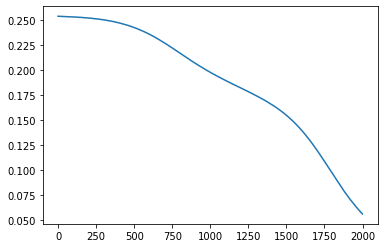

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])